In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes

### Read in the data

# read our data into a dataframe
all_texts = pd.read_csv("train_data_spooky_author.csv")

# look at the first few rows
all_texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
# Only need to do this once
# nltk.download('popular')

In [2]:
### Split data

# split the data by author
byAuthor = all_texts.groupby("author")

### Tokenize (split into individual words) our text

# word frequency by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()


In [3]:
i = iter(byAuthor)
n = next(i)
n[1].loc[0]['text']

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [6]:
n


('HPL',
             id                                               text author
 1      id17569  It never once occurred to me that the fumbling...    HPL
 4      id12958  Finding nothing else, not even gold, the Super...    HPL
 12     id19764  Herbert West needed fresh bodies because his l...    HPL
 13     id18886  The farm like grounds extended back very deepl...    HPL
 19     id20836  His facial aspect, too, was remarkable for its...    HPL
 21     id08075  It was not that the sounds were hideous, for t...    HPL
 28     id27907  Our compasses, depth gauges, and other delicat...    HPL
 29     id08121  This the young warriors took back with them to...    HPL
 33     id11733               Even now They talked in Their tombs.    HPL
 34     id03205  Sheehan especially did they ply with inquiries...    HPL
 35     id01948  He cried aloud once, and a little later gave a...    HPL
 36     id22412  The old tracks crossed River Street at grade, ...    HPL
 38     id00144  After the fir

In [30]:
s=n[1]['text'].str
s.endswith('l.').head()

0     True
2    False
6     True
7    False
8    False
Name: text, dtype: bool

In [ ]:

# for each author...
#for name, group in byAuthor:
    name, group = n:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    # split the text into individual tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(tokens)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[name] = (frequency)
    
# now we have an dictionary where each entry is the frequency distrobution
# of words for a specific author.     

In [74]:
from nltk.corpus import cmudict

def syllables(word):
    #referred from stackoverflow.com/questions/14541303/count-the-number-of-syllables-in-a-word
    count = 0
    vowels = 'aeiouy'
    word = word.lower()
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count

cmudictionary = cmudict.dict()
def nsyl(word):
    global cmudictionary
    try:
        res = [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except KeyError:
        res = syllables(word)
        
    return res
        
nsyl('hello')


2

In [160]:
if "d": print('Hi')

Hi


In [237]:
# Return the number of syllables per sentence in a sample of text.  Ignore blank sentences
# Returns a list of ints

def nsyl_in_sample(text, numsyls=1):
        if not text: return 0 # skip any empty sentences
        
        sylls = [nsyl(word) for word in text.split()]
        return sum([s for s in sylls if s == numsyls])
        
sample = all_texts.loc[0,'text']
nsyl_in_sample(sample,4)

4

In [ ]:
def count_sentences(text):
    corp_read = nltk.corpus.StringCategoryCorpusReader

In [239]:
all_texts['4_syl_words'] = all_texts['text'].apply(lambda t: nsyl_in_sample(t, 4))


In [184]:
all_texts['syl_count'] = all_texts['text'].apply(nsyl_in_sample)

In [188]:
all_texts['word_count'] = all_texts['text'].apply(lambda t: len(t.split()))

In [190]:
byAuthor = all_texts.groupby('author')

In [191]:
i=iter(byAuthor)

In [214]:
h=next(i)

StopIteration: 

In [213]:
mws_texts=h[1]

In [197]:
all_tex

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
#_ = plt.hist(eap_texts['syl_count'], bins=100, range=(0,400))
#plt.title("Edgar Alan Poe")
def do_distplot(texts, colname, divideby_col, x_range=None, colors=['skyblue','red','green']):
    hist_keywords = dict()
    if x_range: hist_keywords['range'] = (0, x_range)
    for author_corpus, color in zip(texts, colors):
        author = author_corpus.iloc[0]['author']
        if not divideby_col:
            to_plot=author_corpus[colname]
        else:
            to_plot=author_corpus[colname]/author_corpus[divideby_col]
        sns.distplot( to_plot , kde=False, bins=100, color=color, label=author, hist_kws=hist_keywords)
    plt.legend()


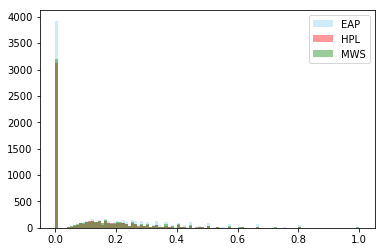

In [286]:

do_distplot([group for _, group in byAuthor], '4_syl_words','word_count', x_range=1)

In [282]:
all_texts.iloc[0]

id                                                       id26305
text           This process, however, afforded me no means of...
author                                                       EAP
sent_count                                                     1
syl_count                                                     61
word_count                                                    41
3_syl_words                                                   15
4_syl_words                                                    4
Name: 0, dtype: object

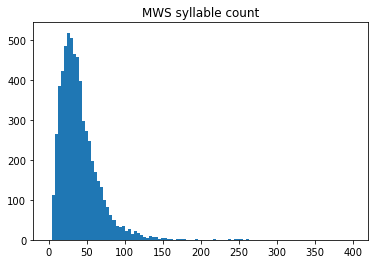

In [227]:
source = mws_texts
_ = plt.hist(source['syl_count'], bins=100, range=(0,400))
plt.title(source.iloc[0]['author'] + ' syllable count')

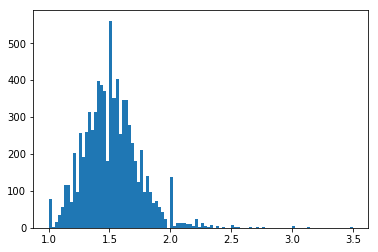

In [207]:
source = mws_texts
_= plt.hist(source['syl_count']/source['word_count'], bins=100)
plt.titls(source.loc[0,'author'] + ' syllables per word')

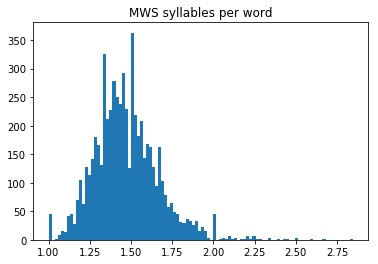

In [220]:
source = mws_texts
_= plt.hist(source['syl_count']/source['word_count'], bins=100)
plt.title(source.iloc[0]['author'] + ' syllables per word')

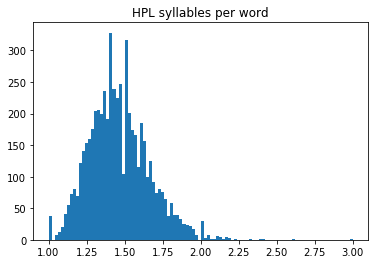

In [221]:
source = hpl_texts
_= plt.hist(source['syl_count']/source['word_count'], bins=100)
plt.title(source.iloc[0]['author'] + ' syllables per word')

In [292]:
all_texts.iloc[0:1]

,id,text,author,sent_count,syl_count,word_count,3_syl_words,4_syl_words
0,id26305,"This process, however, afforded me no means of...",EAP,1,61,41,15,4


In [298]:
all_texts.drop(['author', 'id'], axis=1).head()

,text,sent_count,syl_count,word_count,3_syl_words,4_syl_words
0,"This process, however, afforded me no means of...",1,61,41,15,4
1,It never once occurred to me that the fumbling...,1,20,14,6,0
2,"In his left hand was a gold snuff box, from wh...",1,51,36,9,8
3,How lovely is spring As we looked from Windsor...,1,49,34,6,0
4,"Finding nothing else, not even gold, the Super...",1,47,27,6,0


In [299]:
from sklearn.model_selection import train_test_split
X=all_texts.drop(['author', 'id', 'text'], axis=1)
y=all_texts['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [301]:
preds = model.predict(X_test)

In [319]:
print('predicted:\n', pd.value_counts(preds))
print('actual:\n', pd.value_counts(y_test))
len(y_test)

predicted:
 EAP    4304
HPL    1733
MWS     425
dtype: int64
actual:
 EAP    2587
MWS    2023
HPL    1852
Name: author, dtype: int64


6462

In [331]:
np.unique(preds)

array(['EAP', 'HPL', 'MWS'], dtype=object)

[[1973  474  140]
 [1000  720  132]
 [1331  539  153]]


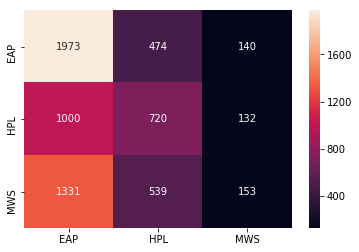

In [332]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test, preds)
print(c)
sns.heatmap(c, annot=True, fmt='d', xticklabels=np.unique(preds), yticklabels=np.unique(preds))


In [327]:
1000+720+132

1852

In [350]:
### Split data

# split the data by author
byAuthor = all_texts.groupby("author")

### Tokenize (split into individual words) our text

# word frequency by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    # split the text into individual tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(tokens)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[name] = (frequency)
    
# now we have an dictionary where each entry is the frequency distrobution
# of words for a specific author.   

In [337]:
eap_words=wordFreqByAuthor['EAP']

In [406]:
index_names=(('EAP', 'word'),('EAP','count'),
                               ('HPL', 'word'),('HPL','count'), 
                               ('MWS', 'word'),('MWS','count'))

num_top_words=100
top_words = None


for au in wordFreqByAuthor:
    index_names = ((au, 'word'), (au, 'count'))
    midx = pd.MultiIndex.from_tuples(index_names)
    newdf = pd.DataFrame(wordFreqByAuthor[au].most_common(num_top_words), columns=midx)
    top_words= pd.concat((top_words, newdf), axis=1)

top_words


EAP             HPL             MWS       
       word  count     word  count     word  count
0         ,  17594      the  10933        ,  12045
1       the  14969        ,   8581      the   9657
2        of   8970      and   6098       of   6137
3         .   7655       of   5846      and   6122
4       and   5733        .   5699        .   5708
5        to   4761        a   3293       to   4829
6         a   4703       to   3249        i   4310
7        in   4124       in   2736        a   2711
8         i   3774        i   2704        ;   2662
9      that   2327      was   2184       my   2659
10       it   2326     that   2021       in   2597
11      was   2229      had   1783      was   2249
12       my   1788       he   1647     that   2091
13     with   1695       it   1402      her   1657
14       is   1668       as   1173      his   1646
15       ``   1628      his   1171     with   1529
16       at   1588        ;   1143       he   1484
17       as   1570     with   1122       me   1473
18    which   1488      for   1020      had   1330
19       ''   1359      but    979      not   1189
20        ;   1354       my    971       it   1180
21      not   1347       at    940      but   1172
22      for   1343       on    933      for   1131
23      had   1318    which    920       as   1097
24       he   1302     from    910       on   1044
25     this   1296      not    894      you   1044
26      his   1278     were    708       by    995
27       by   1206       by    661     from    968
28      but   1200     they    648    which    961
29       be   1097       an    645      she    924
..      ...    ...      ...    ...      ...    ...
70     they    330     very    249     only    279
71    their    325     than    248     love    273
72      our    325    after    247       us    272
73      who    321    about    247    these    271
74     most    316     time    238  raymond    270
75       up    314   things    238    might    269
76      has    312      saw    235    heart    265
77      she    295   though    234    there    258
78   little    275    where    224     some    251
79     only    274       ''    216     then    249
80      say    267     came    216     even    248
81      out    265     over    211       do    247
82     well    265  through    211     than    246
83     made    263      men    204     eyes    243
84     even    260     down    201      man    242
85     time    260    great    195    while    240
86      man    256    thing    195      can    234
87     them    255    never    193     into    234
88  however    254     even    192    every    233
89     thus    254    those    191      did    233
90    first    249    house    189     time    232
91     here    247     must    189   myself    217
92     such    247       if    187     must    212
93      can    241    found    186    first    211
94    other    235      n't    186      own    209
95       us    235     upon    186     said    208
96      yet    232      our    184       am    208
97     much    230      any    182       up    206
98    found    229      you    182   father    206
99    great    227    heard    174      day    206

[100 rows x 6 columns]

In [408]:
# first, let's start with a test sentence
testSentence = "It was a dark and stormy night."

# and then lowercase & tokenize our test sentence
preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())

# create an empy dataframe to put our output in
testProbabilities = pd.DataFrame(columns = ['author','word','probability'])


In [410]:
preProcessedTestSentence

['it', 'was', 'a', 'dark', 'and', 'stormy', 'night', '.']

In [412]:
for i in wordFreqByAuthor.keys():
    # for each word in our test sentence...
    for j  in preProcessedTestSentence:
        # find out how frequently the author used that word
        wordFreq = wordFreqByAuthor[i].freq(j)
        # and add a very small amount to every prob. so none of them are 0
        smoothedWordFreq = wordFreq + 0.000001
        # add the author, word and smoothed freq. to our dataframe
        output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
        testProbabilities = testProbabilities.append(output, ignore_index = True)


In [423]:
testProbailitiesByAuthor = pd.DataFrame(columns = ['author','jointProbability'])
#for i in wordFreqByAuthor.keys():
    i='EAP'
    # get the joint probability that each author wrote each word
    oneAuthor = testProbailities.query('author == "' + i + '"')
    jointProbability = oneAuthor.product(numeric_only = True)[0]
    
    # and add that to our dataframe
    output = pd.DataFrame([[i, jointProbability]], columns = ['author','jointProbability'])
    testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)


In [430]:
oneAuthor = testProbabilities.query('author == "EAP"')

In [434]:
type(oneAuthor.product())

pandas.core.series.Series

In [436]:
X = all_texts.drop('author', axis=1)
y = all_texts['author']

In [463]:
from sklearn.model_selection import StratifiedKFold
rskf = StratifiedKFold(n_splits=5, random_state=1)
folds = rskf.split(X, y)

In [471]:
all_texts['text'].values

array([ 'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.',
       'It never once occurred to me that the fumbling might be a mere mistake.',
       'In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.',
       ...,
       'Mais il faut agir that is to say, a Frenchman never faints outright.',
       'For an item of news like this, it strikes us it was very coolly received."',
       'He laid a gnarled claw on my shoulder, and it seemed to me that its shaking was not altogether that of mirth.'], dtype=object)

In [468]:
lfy = [_[1] for _ in lf]

In [469]:
round

[array([   0,    1,    2, ..., 4021, 4024, 4033]),
 array([3851, 3855, 3864, ..., 7888, 7894, 7896]),
 array([ 7801,  7805,  7806, ..., 11803, 11805, 11807]),
 array([11692, 11697, 11700, ..., 15702, 15703, 15705]),
 array([15642, 15643, 15644, ..., 19576, 19577, 19578])]